# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [4]:
from sklearn.datasets import  fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [5]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [7]:
spaceship.shape

(8693, 14)

**Check for data types**

In [9]:
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [11]:
spaceship.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [13]:
X = spaceship.dropna()
X

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [15]:
# Use .loc to modify 'Cabin' column
X.loc[:, 'Cabin'] = X['Cabin'].str[0]

- Drop PassengerId and Name

In [17]:
X = X.drop(columns=['PassengerId', 'Name'])

- For non-numerical columns, do dummies.

In [19]:
X_dummies = pd.get_dummies(X, columns=['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP'])
X_dummies

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False,...,False,False,False,False,False,False,False,True,True,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True,True,False,False,...,False,False,True,False,False,False,False,True,True,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,False,True,False,...,False,False,False,False,False,False,False,True,True,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True,True,False,False,...,False,False,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,...,False,False,False,True,False,False,True,False,True,False
8690,26.0,0.0,0.0,1872.0,1.0,0.0,True,True,False,False,...,False,False,False,True,False,False,False,True,True,False
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False


**Perform Train Test Split**

In [59]:
features = X_dummies.drop(columns = ["Transported"])
target = X_dummies["Transported"]

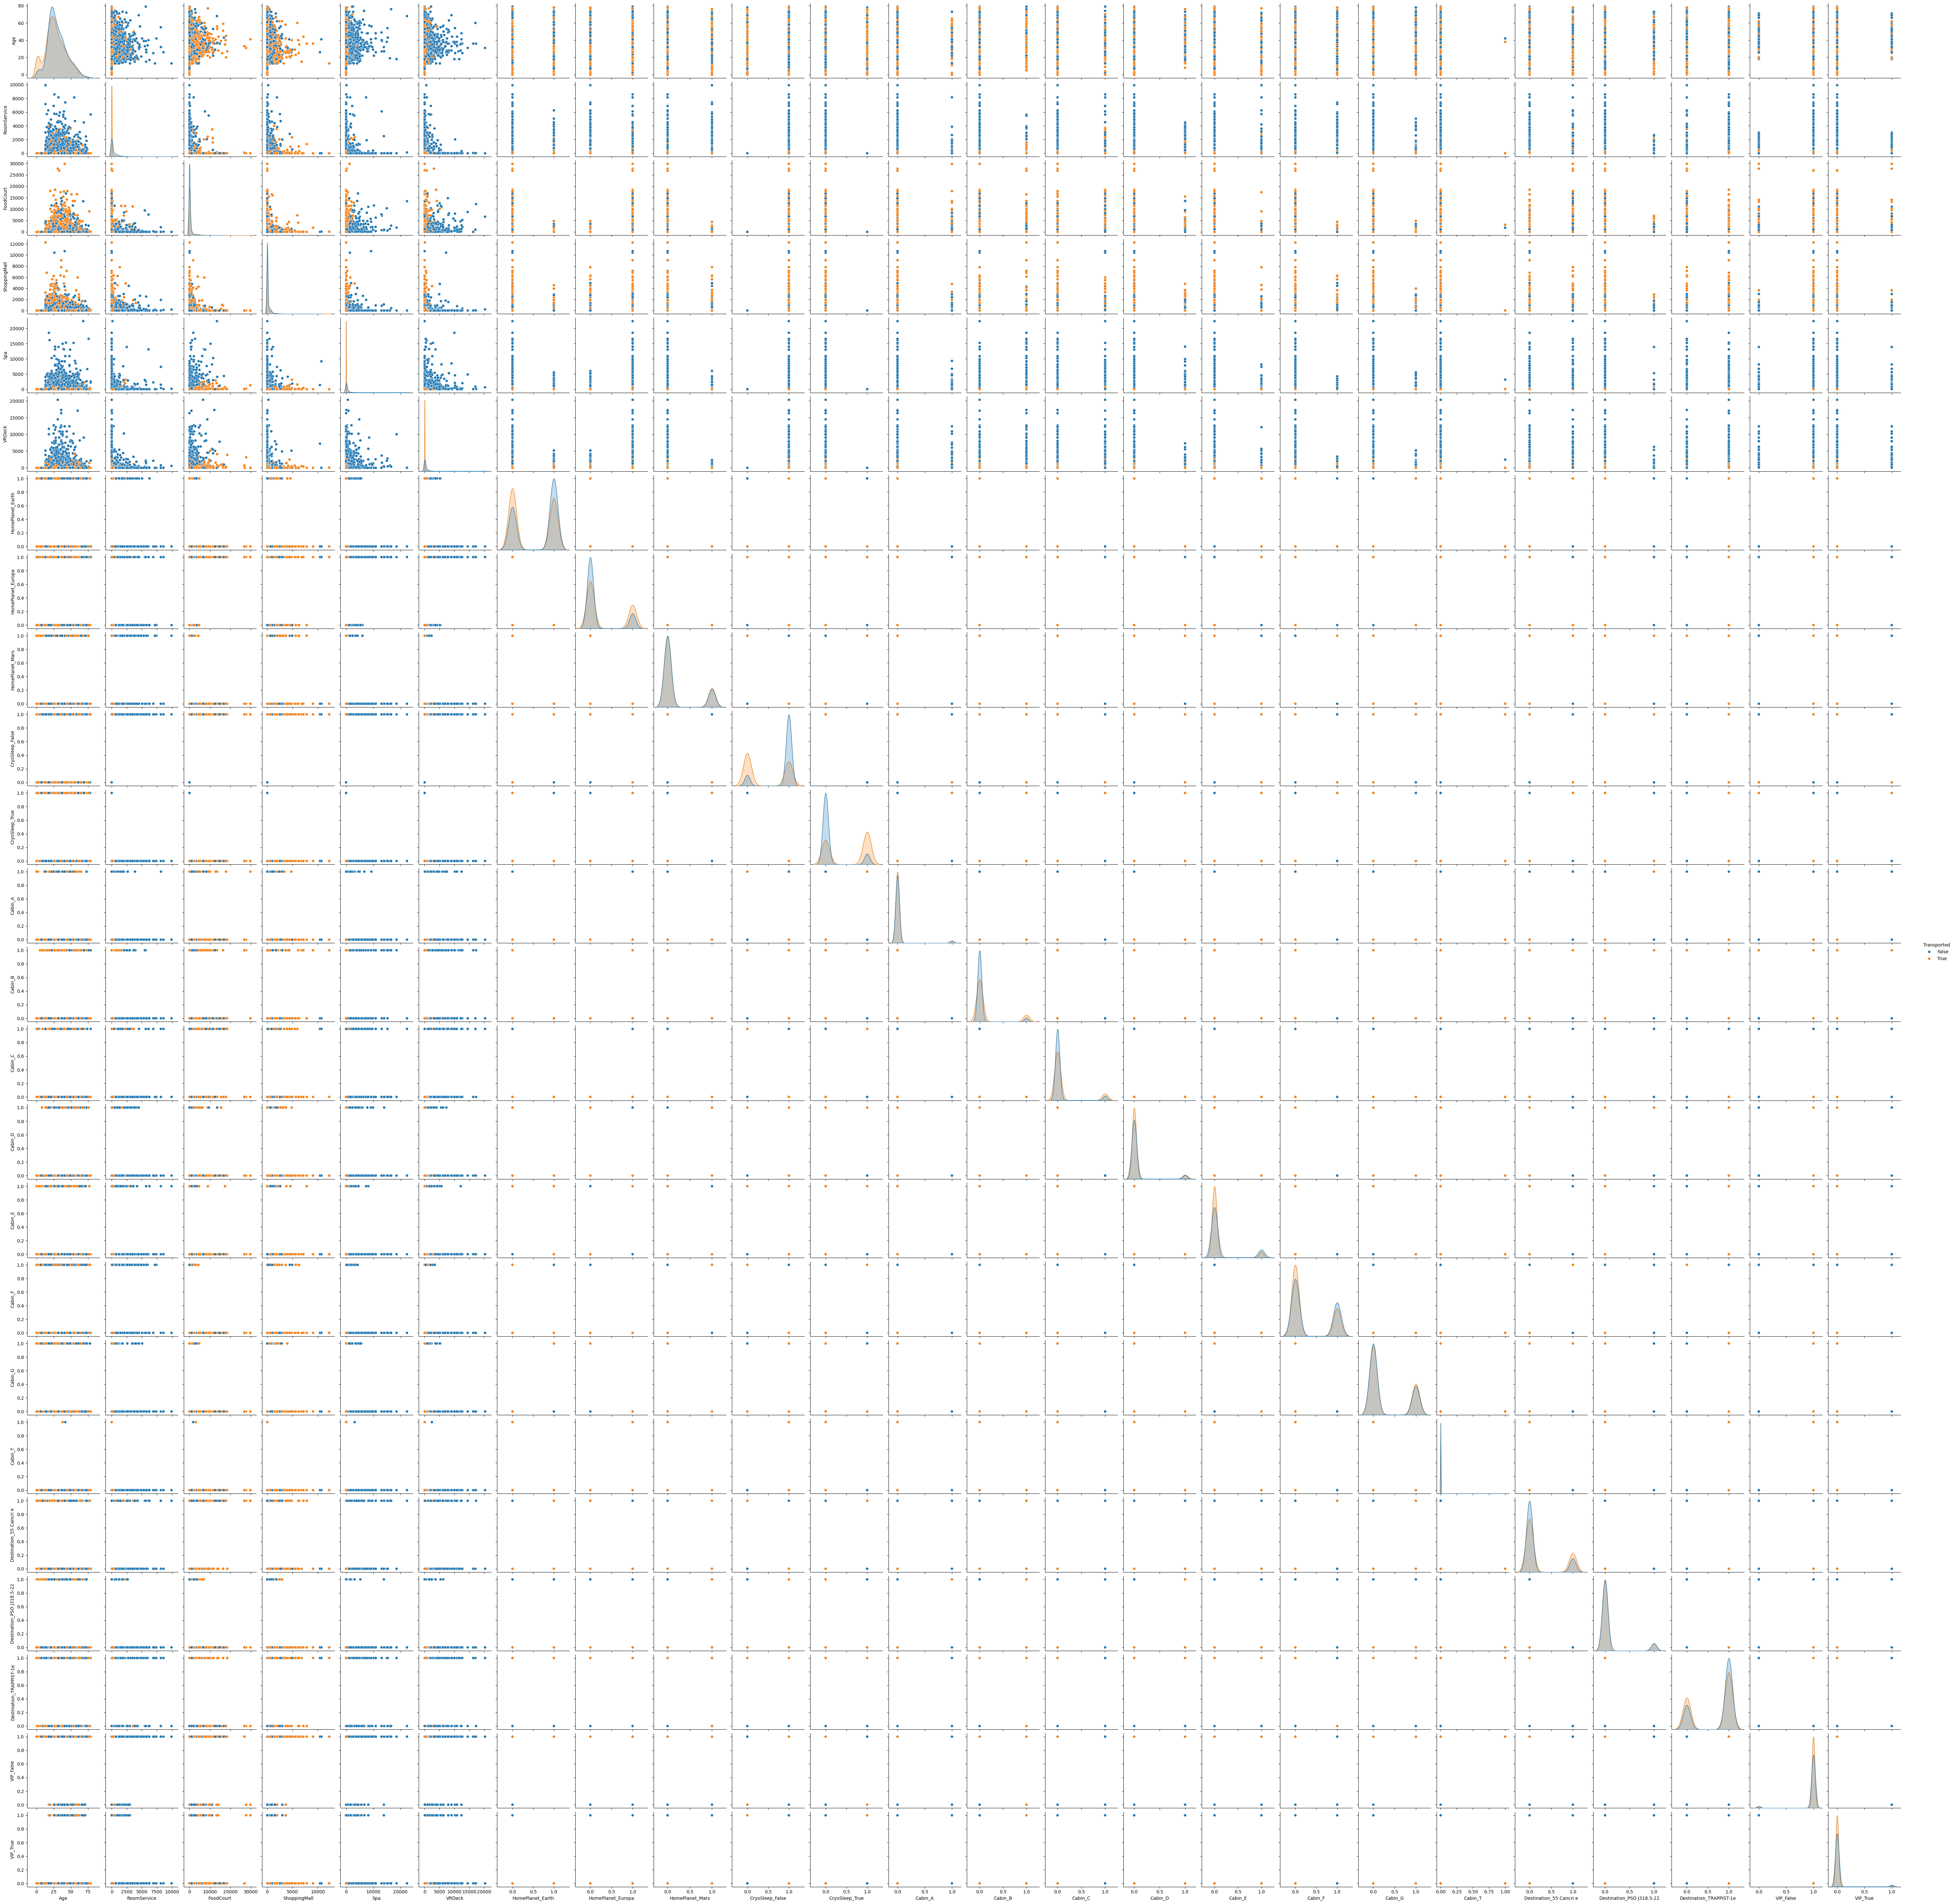

In [60]:
sns.pairplot(X_dummies, hue="Transported")
plt.show()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [62]:
X_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
3432,32.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False,...,False,True,False,False,False,False,False,True,True,False
7312,4.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False,...,False,False,False,True,False,False,False,True,True,False
2042,30.0,0.0,236.0,0.0,1149.0,0.0,True,False,False,True,...,False,False,True,False,False,False,False,True,True,False
4999,17.0,13.0,0.0,565.0,367.0,1.0,False,False,True,True,...,False,True,False,False,False,False,False,True,True,False
5755,26.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False,...,False,False,False,True,False,False,False,True,True,False


In [63]:
normalizer = MinMaxScaler()

In [64]:
normalizer.fit(X_train)

MinMaxScaler()

In [65]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [66]:
X_train_norm

array([[4.05063291e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.06329114e-02, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.79746835e-01, 0.00000000e+00, 7.91600979e-03, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [4.55696203e-01, 0.00000000e+00, 1.59527723e-01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.30379747e-01, 0.00000000e+00, 1.34169658e-04, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.77215190e-01, 2.01612903e-04, 2.95508671e-02, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [67]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns, index= X_train.index)
X_train_norm.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
3432,0.405063,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7312,0.050633,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2042,0.379747,0.00000,0.007916,0.000000,0.051276,0.000000,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4999,0.215190,0.00131,0.000000,0.046111,0.016378,0.000049,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5755,0.329114,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [68]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns, index= X_test.index)
X_test_norm.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
2453,0.632911,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1334,0.227848,0.0,0.000000,0.0,0.00000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
8272,0.189873,0.0,0.000000,0.0,0.00000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5090,0.658228,0.0,0.000000,0.0,0.00000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4357,0.784810,0.0,0.054775,0.0,0.07774,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


**Model Selection** - now you will try to apply different ensemble methods in order to get a better model

- Bagging and Pasting

In [71]:
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000)

In [72]:
#Training Bagging model with our normalized data
bagging_reg.fit(X_train_norm, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                 max_samples=1000, n_estimators=100)

In [73]:
#Evaluate model's performance
pred = bagging_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", bagging_reg.score(X_test_norm, y_test))

MAE 0.2767971969641702
RMSE 0.3775127602658541
R2 score 0.42993646334582303


- Random Forests

In [75]:
#Initialize a Random Forest
forest = RandomForestRegressor(n_estimators=100,
                             max_depth=20)

In [76]:
#Training the model
forest.fit(X_train_norm, y_train)

RandomForestRegressor(max_depth=20)

In [77]:
#Evaluate the model
pred = forest.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", forest.score(X_test_norm, y_test))

MAE 0.2674759150884053
RMSE 0.38259217703083637
R2 score 0.4144929042992206


- Gradient Boosting

In [79]:
#Initialize a AdaBoost model
gb_reg = GradientBoostingRegressor(max_depth=20,
                                   n_estimators=100)

In [80]:
#Training the model
gb_reg.fit(X_train_norm, y_train)

GradientBoostingRegressor(max_depth=20)

In [81]:
#Evaluate the model
pred = gb_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", gb_reg.score(X_test_norm, y_test))

MAE 0.26064269590534384
RMSE 0.4150996061197487
R2 score 0.31076926799691784


- Adaptive Boosting

In [83]:
#Initialize a AdaBoost model
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),
                            n_estimators=100)

In [84]:
#Training the model
ada_reg.fit(X_train_norm, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  n_estimators=100)

In [85]:
#Evaluate the model
pred = ada_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", ada_reg.score(X_test_norm, y_test))

MAE 0.24626493487518447
RMSE 0.42832734292018376
R2 score 0.26614274922774117


Which model is the best and why?